In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix

%matplotlib inline
np.random.seed(42)

data = pd.read_csv("./fashion-mnist_train.csv")

## Import data

In [5]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [6]:
# function to plot one image
def plot_data(centers,vmin,vmax):
    f, axarr = plt.subplots(1,centers.shape[0], sharex=True,sharey=True)
    for i in range(centers.shape[0]):
        axarr[i].imshow(centers[i,].reshape([28,28]),cmap='Greys',clim=(vmin, vmax),interpolation='nearest')
        axarr[i].set(aspect='equal')
        axarr[i].get_xaxis().set_visible(False)
        axarr[i].get_yaxis().set_visible(False)

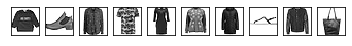

In [7]:
# the 10 first images
plot_data(X[0:10,],0,255)

In [10]:
# and their labels shoes, jacket, ...
y

array([2, 9, 6, ..., 8, 8, 7])

In [11]:
# first we will encode them as binary vectors
# ex : 2 -> [0,1,0,0,...]
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y.reshape(-1,1))

OneHotEncoder()

In [12]:
# train / test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
#  binary matrix of outputs
Ybin_train = enc.transform(y_train.reshape(-1,1)).todense()
Ybin_test = enc.transform(y_test.reshape(-1,1)).todense()

In [22]:
# scaling of X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_centered = scaler.transform(np.array(X_train,np.float))
X_test_centered  = scaler.transform(np.array(X_test,np.float))

## MLP input = scaled vectors 

In [23]:
# cerate a mlp in keras
from keras.layers import Layer,Input, Dense
from keras.models import Model


inputs = Input(shape=(X.shape[1],)) 

hidden = Dense(32,activation='relu')(inputs)

outputs = Dense(10, activation='softmax')(hidden)

model1 = Model(inputs,outputs)

In [24]:
# compile loss defintion here classification categorical_crossentropy
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# learn
nbepoch = 15
hist = model1.fit(X_train_centered,Ybin_train,batch_size=20,epochs=nbepoch,validation_data=(X_test_centered,Ybin_test))

Epoch 1/15
2100/2100 [==============================] - 1s 510us/step - loss: 0.4976 - accuracy: 0.8253 - val_loss: 0.4069 - val_accuracy: 0.8563
Epoch 2/15
2100/2100 [==============================] - 1s 465us/step - loss: 0.3727 - accuracy: 0.8656 - val_loss: 0.4002 - val_accuracy: 0.8558
Epoch 3/15
2100/2100 [==============================] - 1s 466us/step - loss: 0.3334 - accuracy: 0.8781 - val_loss: 0.3781 - val_accuracy: 0.8695
Epoch 4/15
2100/2100 [==============================] - 1s 462us/step - loss: 0.3133 - accuracy: 0.8861 - val_loss: 0.3763 - val_accuracy: 0.8698
Epoch 5/15
2100/2100 [==============================] - 1s 464us/step - loss: 0.2943 - accuracy: 0.8916 - val_loss: 0.3734 - val_accuracy: 0.8685
Epoch 6/15
2100/2100 [==============================] - 1s 466us/step - loss: 0.2795 - accuracy: 0.8968 - val_loss: 0.3663 - val_accuracy: 0.8756
Epoch 7/15
2100/2100 [==============================] - 1s 471us/step - loss: 0.2658 - accuracy: 0.9013 - val_loss: 0.3648 -

In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16,8)

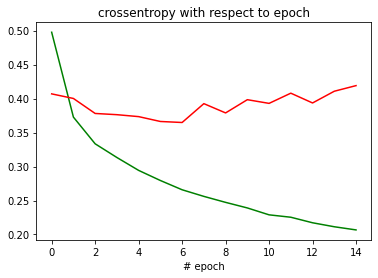

In [26]:
# plot the results
h=plt.plot(range(nbepoch),hist.history["loss"],'-g',label='Train loss')
h=plt.plot(range(nbepoch),hist.history["val_loss"],'-r',label='Test loss')
h=plt.title(u"crossentropy with respect to epoch")
h=plt.xlabel(u"# epoch")

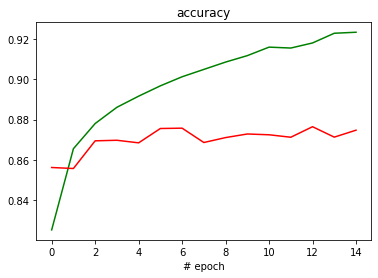

In [28]:
# acuracy
h=plt.plot(range(nbepoch),hist.history["accuracy"],'-g',label='Train accuracy')
h=plt.plot(range(nbepoch),hist.history["val_accuracy"],'-r',label='Test accuracy')
h=plt.title(u"accuracy")
h=plt.xlabel(u"# epoch")

## CNN input = images

In [29]:
# reshape the X to 28*28 grayscale images
Xim_train=X_train.reshape(X_train.shape[0],28,28,1)
Xim_test=X_test.reshape(X_test.shape[0],28,28,1)

In [31]:
# Define a CNN 
from keras.layers import BatchNormalization,Conv2D,Flatten,MaxPooling2D,Dropout

inputs = Input(shape=(Xim_train.shape[1],Xim_train.shape[2],1))

inn = BatchNormalization()(inputs)

conv1 = Conv2D(64, (4, 4),  activation='relu')(inn)

p1 = MaxPooling2D(pool_size=(2, 2))(conv1)

d1 = Dropout(0.2)(p1)

conv2 = Conv2D(64, (4, 4),  activation='relu')(d1)

p2 = MaxPooling2D(pool_size=(2, 2))(conv2)

d2 = Dropout(0.1)(p2)

ifl = Flatten()(d2)

hidden1 = Dense(100,activation='relu')(ifl)

hd1 = Dropout(0.1)(hidden1)

hidden2 = Dense(30,activation='relu')(hd1)

hd2 = Dropout(0.1)(hidden2)

outputs = Dense(10, activation='softmax')(hd2)

model2 = Model(inputs,outputs)


In [32]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
nbepoch = 10
hist = model2.fit(Xim_train,Ybin_train,batch_size=20,epochs=nbepoch,validation_data=(Xim_test,Ybin_test))

Epoch 1/10
2100/2100 [==============================] - 13s 6ms/step - loss: 0.5754 - accuracy: 0.7918 - val_loss: 0.3675 - val_accuracy: 0.8659
Epoch 2/10
2100/2100 [==============================] - 14s 7ms/step - loss: 0.3982 - accuracy: 0.8555 - val_loss: 0.3356 - val_accuracy: 0.8786
Epoch 3/10
2100/2100 [==============================] - 14s 7ms/step - loss: 0.3536 - accuracy: 0.8714 - val_loss: 0.3270 - val_accuracy: 0.8814
Epoch 4/10
2100/2100 [==============================] - 14s 6ms/step - loss: 0.3252 - accuracy: 0.8824 - val_loss: 0.2976 - val_accuracy: 0.8932
Epoch 5/10
2100/2100 [==============================] - 14s 7ms/step - loss: 0.3042 - accuracy: 0.8877 - val_loss: 0.2858 - val_accuracy: 0.8967
Epoch 6/10
2100/2100 [==============================] - 14s 7ms/step - loss: 0.2819 - accuracy: 0.8949 - val_loss: 0.2889 - val_accuracy: 0.8961
Epoch 7/10
2100/2100 [==============================] - 14s 7ms/step - loss: 0.2724 - accuracy: 0.8991 - val_loss: 0.2875 - val_ac

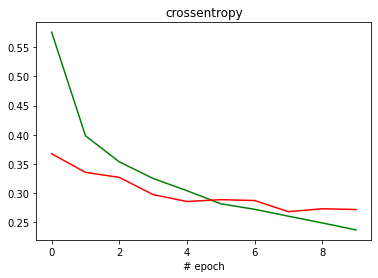

In [34]:
h=plt.plot(range(nbepoch),hist.history["loss"],'-g',label='Train loss')
h=plt.plot(range(nbepoch),hist.history["val_loss"],'-r',label='Test loss')
h=plt.title(u"crossentropy")
h=plt.xlabel(u"# epoch")

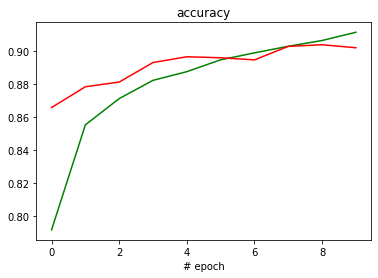

In [35]:
h=plt.plot(range(nbepoch),hist.history["accuracy"],'-g',label='Train accuracy')
h=plt.plot(range(nbepoch),hist.history["val_accuracy"],'-r',label='Test accuracy')
h=plt.title(u"accuracy")
h=plt.xlabel(u"# epoch")

In [36]:
# testing set performance
evaluation = model2.evaluate(Xim_test,Ybin_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.2720 - accuracy: 0.9022


In [37]:
evaluation

[0.27201706171035767, 0.9021666646003723]

## Experiments 

Change the architecture of both network and compare the results

